In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
import warnings
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./income_evaluation.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [6]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
features = df.columns[:-1].tolist()

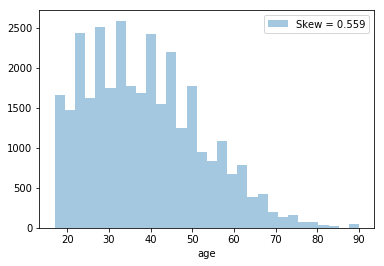

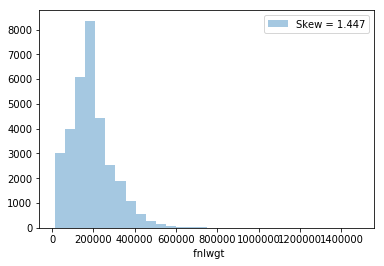

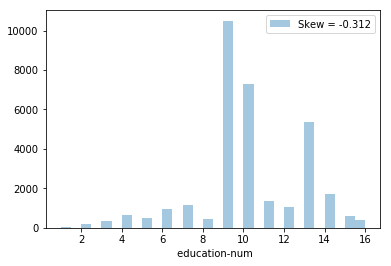

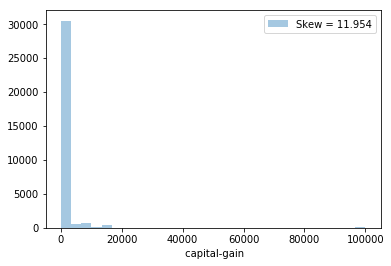

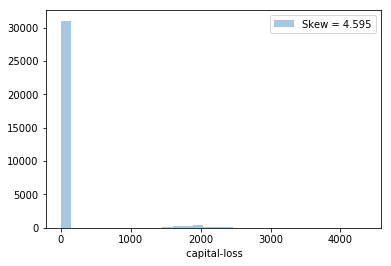

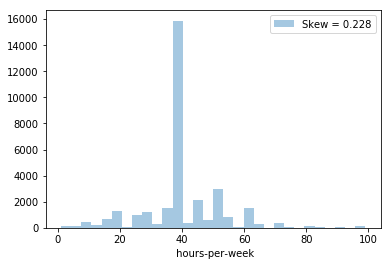

In [8]:
for feat in features:
    if df[feat].dtype != "object":
        skew = df[feat].skew()
        sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
        plt.legend(loc='best')
        plt.show()

In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(' ', '') # remove blanks

(array([0, 1]), <a list of 2 Text xticklabel objects>)

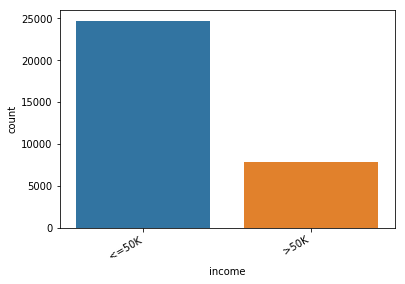

In [11]:
ax = sns.countplot(df['income'])
plt.xticks(rotation = 30, ha='right')


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

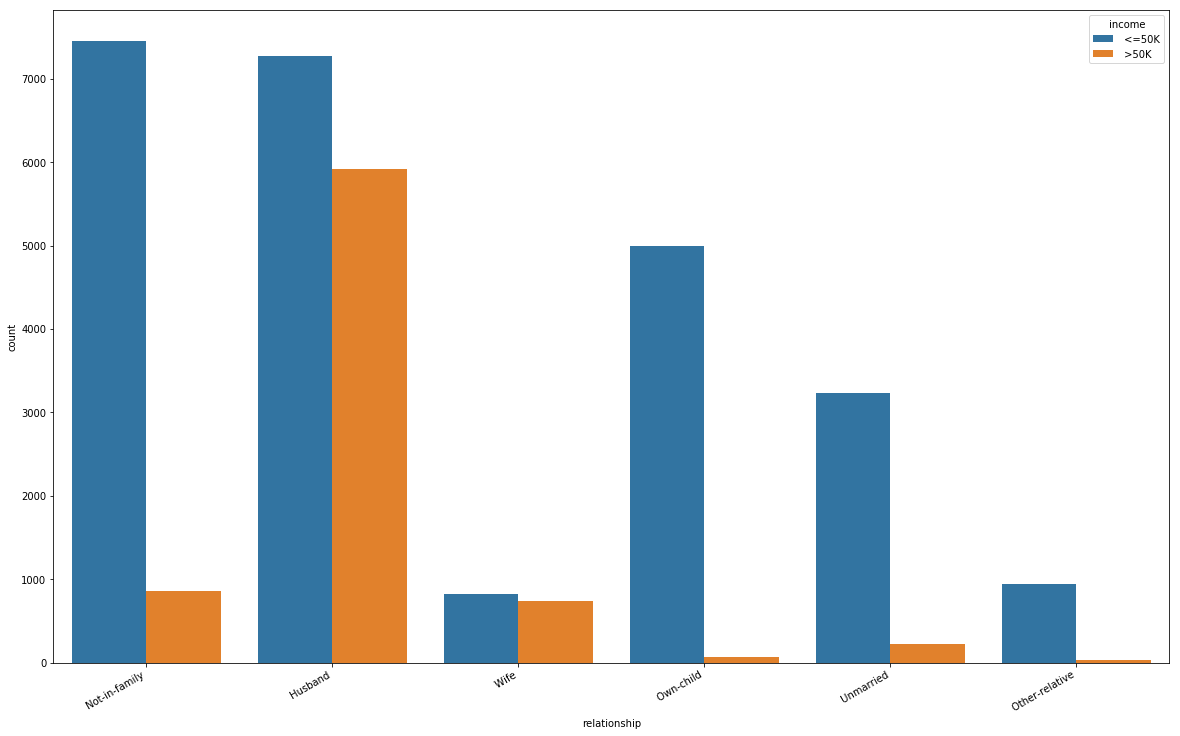

In [12]:
plt.figure(figsize=(20,12))
ax = sns.countplot(df['relationship'], hue = df.income)
plt.xticks(rotation = 30, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

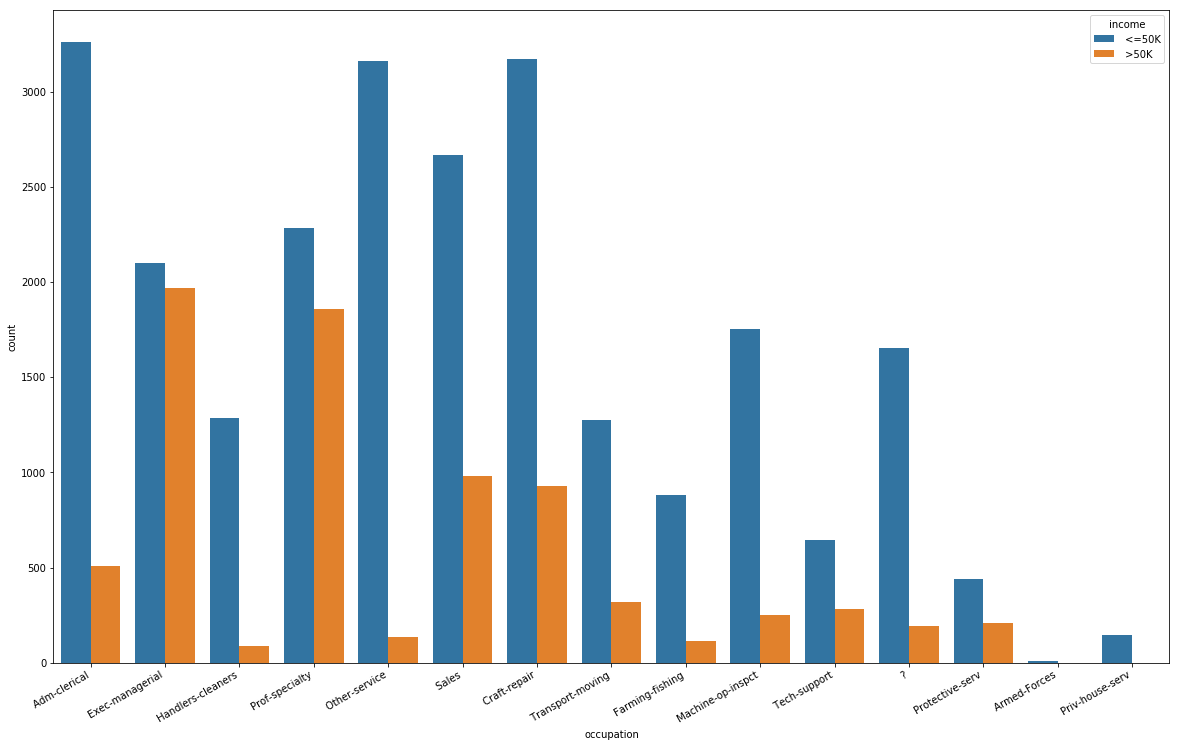

In [13]:
plt.figure(figsize=(20,12))
ax = sns.countplot(df['occupation'], hue = df.income)
plt.xticks(rotation = 30, ha='right')

In [14]:
mockdf = df.copy()

In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [16]:
preprocess_cols = []
for feat in df.columns:
    if df[feat.strip()].dtype == "object":
        preprocess_cols.append(feat.strip())


In [17]:
def map_dict(lst):
    items = {}
    count = 0
    for item in lst:
        items[item] = count
        count += 1
    return items

# storing the dictionaries according to the preprocess_cols
preprocess_out = [map_dict(list(df[x].unique())) for x in preprocess_cols]

In [18]:
for col, vals in zip(preprocess_cols, preprocess_out):
    df[col] = df[col].apply(lambda x: vals[x])

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


## total number of countries -> one hotencode and transform

there are 42 native countries so we will hot encode the labels

In [20]:
mockdf['native-country'].nunique()

42

In [21]:
native_countries = pd.get_dummies(mockdf['native-country'])
native_countries.head()

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
native_countries.columns.values

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [23]:
mockdf = mockdf.drop('native-country', axis = 1)

In [24]:
mockdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [25]:
cols = sorted(list(native_countries.columns)) # reorder
print(cols)
cols.remove(" United-States")
cols.append(" United-States")

[' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam', ' Yugoslavia']


In [26]:
country = native_countries[cols]

In [27]:
other_country = country.loc[:,' ?':' Yugoslavia'].max(axis=1)
us_country = country.loc[:,' United-States':].max(axis=1)

In [28]:
mockdf = pd.concat([df,us_country,other_country], axis =1)
mockdf = mockdf.rename(columns = {0:"United_state",1:"Other_country"})

In [29]:
mockdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,United_state,Other_country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0,1,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0,1,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0,1,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0,1,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0,0,1


In [30]:
reorder_cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week','United_state', 
                'Other_country', 'income'] 

In [31]:
mockdf = mockdf[reorder_cols]

In [32]:
mockdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,United_state,Other_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,1,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,1,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,1,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,1,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,0,1,0


## the preprocess can be done using any 2 methods, I have selected the first one

In [33]:
features = list(df.columns[:-1])
target = df.columns[-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33, random_state=42)

### PCA + LR, LR, SS +LR

In [35]:
svm_param = {'logistic__C': np.logspace(-4, 4, 4)}
print("***************************************************************")
pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    **svm_param
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of PCA + logistic regression : {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")

print("***************************************************************")
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('logistic', logistic)])
param_grid = {
    **svm_param
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of logistic regression : {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")

print("***************************************************************")
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('scaler', StandardScaler()),('logistic', logistic)])
param_grid = {
    **svm_param
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of standard scalar +  logistic regression : {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")



***************************************************************
Best parameter (CV score=0.780):
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.1, verbose=0,
                                    warm_start=False))],
         verbose=False)

 

accuracy of PCA + logistic regression : 0.7831751349339289
***************************************************************
*************

### PCA + DT, DT, SS + DT

In [36]:
dtc_param = {'dtc__criterion':['gini','entropy'],
'dtc__max_depth':[4,5,6,7,8,9,10,11,12,15,20]}
print("***************************************************************")

logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('dtc', DecisionTreeClassifier(random_state=0))])
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    **dtc_param
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of PCA + Decision Tree: {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")

print("***************************************************************")
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('dtc', DecisionTreeClassifier(random_state=0))])
param_grid = {
    **dtc_param
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of Decision Tree : {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")

print("***************************************************************")
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('scaler', StandardScaler()),('dtc', DecisionTreeClassifier(random_state=0))])
param_grid = {
    **dtc_param
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_estimator_)
print("\n \n")
print(f"accuracy of standard scalar +  Decision Tree : {accuracy_score(y_test, search.best_estimator_.predict(X_test))}")
print("***************************************************************")


***************************************************************
Best parameter (CV score=0.819):
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtc',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=7,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         ve